# 04: Additional EDA

What follow are some additional avenues of exploration allowed by the final combination of the two additional dataframes into one. During the modeling phase, there was some focus on building a model to predict duration of stay for an animal (in addition to the primary focus of classifying/predicting ultimate outcome), so there are also some extra visuals related to this.

Imports and read-ins:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('../data/main.csv')

Checking read-ins:

In [3]:
df.head()

,animal_type,color,breed,intake_type,outcome_type,intake_condition,month_in,day_in,prev_adoption,prev_transfer,...,prev_disposal,prev_missing,age_upon_intake,is_named_in,mix,sex,is_neutered,days_in_shelter,age_type,adopted
0,Dog,yellow white,italiano spinone mix,Public Assist,Return to Owner,Normal,12,Friday,0,0,...,0,0,7.0,1,1,Male,Neutered/Spayed,1,5 Years-8 Years,0
1,Dog,yellow white,italiano spinone mix,Public Assist,Return to Owner,Normal,3,Friday,0,0,...,0,0,6.0,1,1,Male,Neutered/Spayed,1,5 Years-8 Years,0
2,Dog,tricolor,dachshund,Owner Surrender,Transfer,Normal,4,Wednesday,0,0,...,0,0,1.0,1,0,Male,Neutered/Spayed,4,6 Months-2 Years,0
3,Dog,brown white,sheepdog shetland,Public Assist,Return to Owner,Injured,11,Saturday,0,0,...,0,0,1.0,1,0,Male,Neutered/Spayed,0,6 Months-2 Years,0
4,Dog,black white,bull pit retriever labrador,Stray,Return to Owner,Aged,11,Saturday,0,0,...,0,0,1.0,1,0,Female,Neutered/Spayed,0,6 Months-2 Years,0


In [4]:
df.dtypes

animal_type           object
color                 object
breed                 object
intake_type           object
outcome_type          object
intake_condition      object
month_in               int64
day_in                object
prev_adoption          int64
prev_transfer          int64
prev_ret_to_owner      int64
prev_rto_adopt         int64
prev_disposal          int64
prev_missing           int64
age_upon_intake      float64
is_named_in            int64
mix                    int64
sex                   object
is_neutered           object
days_in_shelter        int64
age_type              object
adopted                int64
dtype: object

In [6]:
# Fixing dtypes
df['month_in'] = df['month_in'].astype(str)

## I. EDA - Days in Shelter

Here, some visuals to get a sense of the nuances in the dataset as they relate to duration of stay (in days) for animals who go through the Austin system:

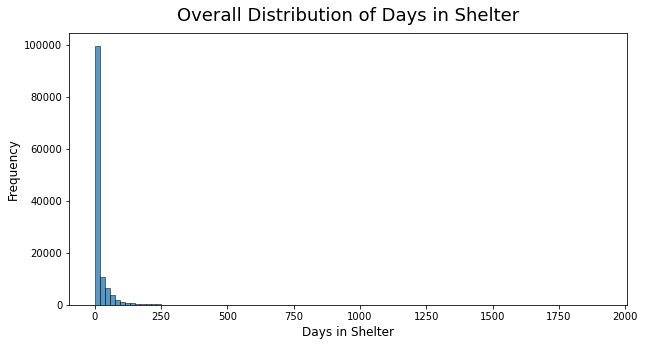

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, bins=100, x="days_in_shelter")
plt.title('Overall Distribution of Days in Shelter', fontsize = 18, pad = 12)
plt.xlabel("Days in Shelter", fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)
plt.show()

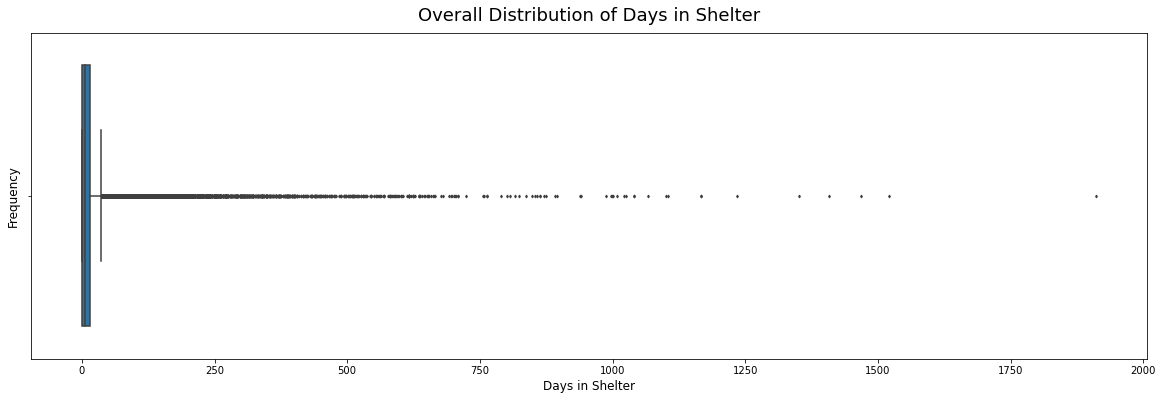

In [8]:
plt.figure(figsize=(20,6))
sns.boxplot(df['days_in_shelter'], fliersize=2)
plt.title('Overall Distribution of Days in Shelter', fontsize = 18, pad = 12)
plt.xlabel("Days in Shelter", fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)
plt.show();

From this boxplot we can visualize the outliers of animals in our shelter. We want to further investigate what variables affect the number of days an animal spends in the shelter. Below are barplots breaking down the average duration of stay by different variables, with the dotted line representing the overall average:

### Days in Shelter by `intake_type`:

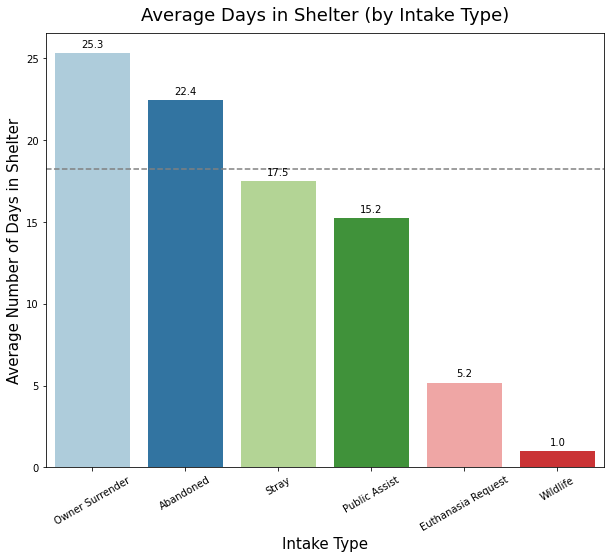

In [9]:
col_series = df['days_in_shelter'].groupby(df['intake_type']).mean()

plt.figure(figsize=(10,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            palette="Paired",
            order = ['Owner Surrender', 'Abandoned', 'Stray', 'Public Assist', 'Euthanasia Request',
                    'Wildlife'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Average Days in Shelter (by Intake Type)', fontsize = 18, pad = 12)
plt.xlabel("Intake Type", fontsize = 15)
plt.xticks(rotation=30)
plt.axhline(y=df['days_in_shelter'].mean(), color='gray', linestyle='dashed', label="Shelter Average")
plt.ylabel("Average Number of Days in Shelter",fontsize = 15);

Animals that brought to the shelter by an owner surrender had the highest average days in the shelter, while animals that were considered wildlife spent just an average of one day in the shelter-- intuitively because the animal would be transferred to a different facility.

### Days in Shelter by `animal_type`:

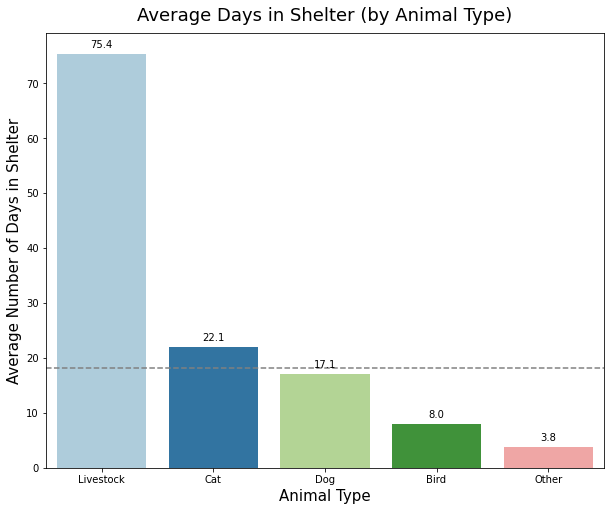

In [10]:
col_series = df['days_in_shelter'].groupby(df['animal_type']).mean()

plt.figure(figsize=(10,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            palette="Paired",
            order = ['Livestock', 'Cat', 'Dog', 'Bird', 'Other'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Average Days in Shelter (by Animal Type)', fontsize = 18, pad = 12)
plt.xlabel("Animal Type", fontsize = 15)
plt.axhline(y=df['days_in_shelter'].mean(), color='gray', linestyle='dashed', label="Shelter Average")
plt.ylabel("Average Number of Days in Shelter",fontsize = 15);

### Days in Shelter by `intake_condition`:

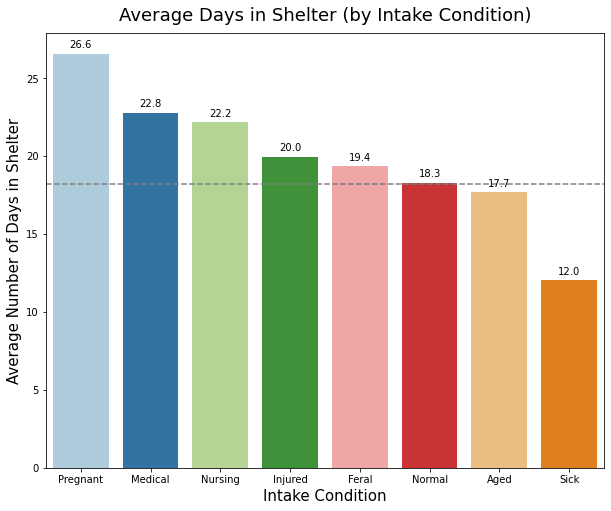

In [11]:
col_series = df['days_in_shelter'].groupby(df['intake_condition']).mean()

plt.figure(figsize=(10,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            palette="Paired",
            order = ['Pregnant', 'Medical', 'Nursing', 'Injured',
                    'Feral', 'Normal', 'Aged', 'Sick'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Average Days in Shelter (by Intake Condition)', fontsize = 18, pad = 12)
plt.xlabel("Intake Condition", fontsize = 15)
plt.axhline(y=df['days_in_shelter'].mean(), color='gray', linestyle='dashed', label="Shelter Average")
plt.ylabel("Average Number of Days in Shelter",fontsize = 15);

### Days in Shelter by `outcome_type`:

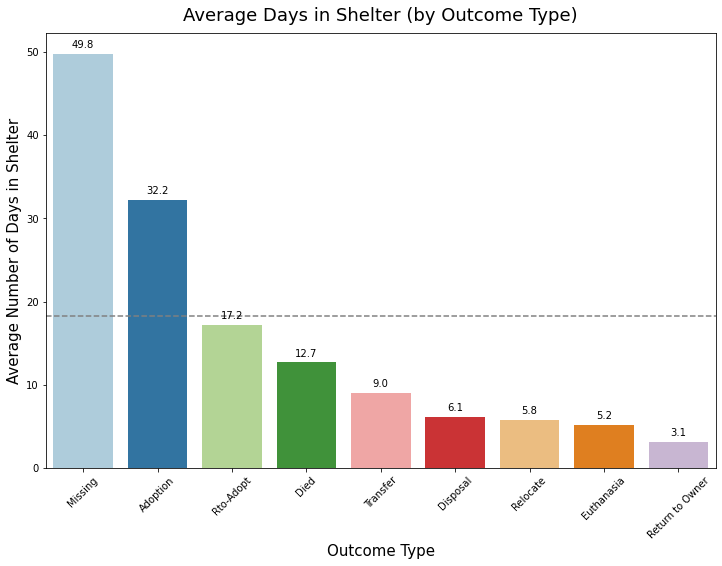

In [12]:
col_series = df['days_in_shelter'].groupby(df['outcome_type']).mean()

plt.figure(figsize=(12,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            palette="Paired",
            order = ['Missing', 'Adoption', 'Rto-Adopt', 'Died', 'Transfer',
               'Disposal', 'Relocate', 'Euthanasia','Return to Owner'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Average Days in Shelter (by Outcome Type)', fontsize = 18, pad = 12)
plt.xlabel("Outcome Type", fontsize = 15)
plt.xticks(rotation=45)
plt.axhline(y=df['days_in_shelter'].mean(), color='gray', linestyle='dashed', label="Shelter Average")
plt.ylabel("Average Number of Days in Shelter",fontsize = 15);

### Days in Shelter by `day_in`:

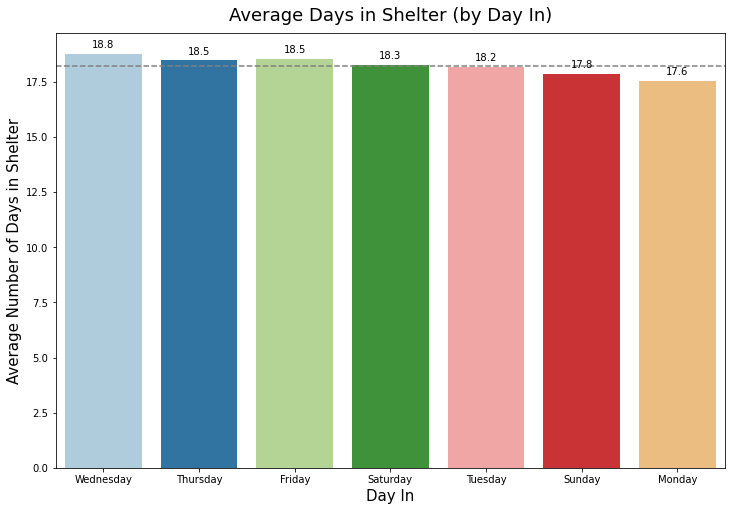

In [13]:
col_series = df['days_in_shelter'].groupby(df['day_in']).mean()

plt.figure(figsize=(12,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            palette="Paired",
            order = ['Wednesday', 'Thursday', 'Friday', 'Saturday','Tuesday', 
                     'Sunday', 'Monday'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Average Days in Shelter (by Day In)', fontsize = 18, pad = 12)
plt.xlabel("Day In", fontsize = 15)
plt.axhline(y=df['days_in_shelter'].mean(), color='gray', linestyle='dashed', label="Shelter Average")
plt.ylabel("Average Number of Days in Shelter",fontsize = 15);

### Days in Shelter by `month_in`:

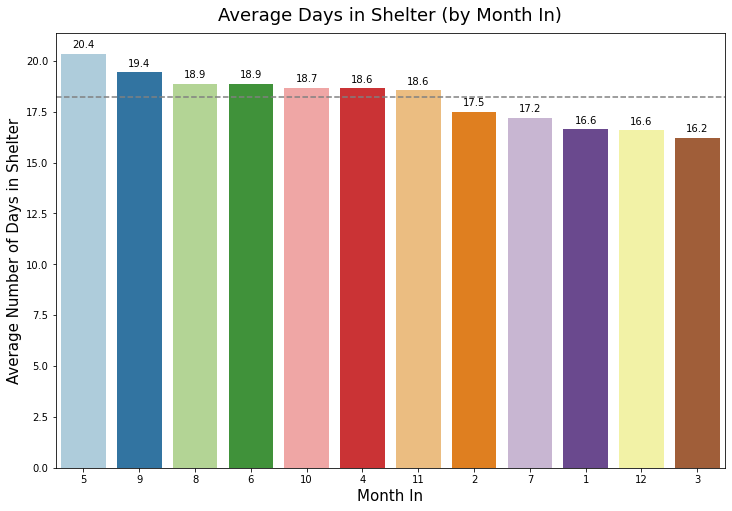

In [14]:
col_series = df['days_in_shelter'].groupby(df['month_in']).mean()

plt.figure(figsize=(12,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            order = ['5', '9', '8', '6','10','4', '11', '2', '7','1', '12', '3'],
            palette="Paired")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Average Days in Shelter (by Month In)', fontsize = 18, pad = 12)
plt.xlabel("Month In", fontsize = 15)
plt.axhline(y=df['days_in_shelter'].mean(), color='gray', linestyle='dashed', label="Shelter Average")
plt.ylabel("Average Number of Days in Shelter",fontsize = 15);

### Days in Shelter by `sex`:

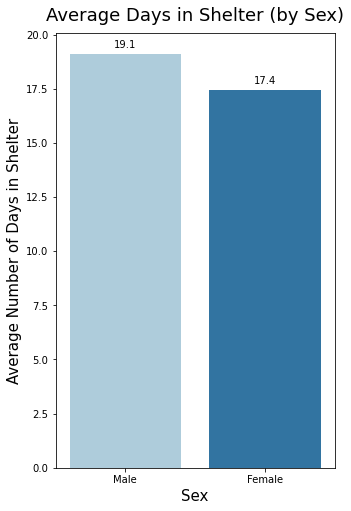

In [15]:
col_series = df['days_in_shelter'].groupby(df['sex']).mean()

plt.figure(figsize=(5,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df,
            palette="Paired",
            order = ['Male', 'Female'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Average Days in Shelter (by Sex)', fontsize = 18, pad = 12)
plt.xlabel("Sex", fontsize = 15)
plt.ylabel("Average Number of Days in Shelter",fontsize = 15);

### Days in Shelter by `age_range`:

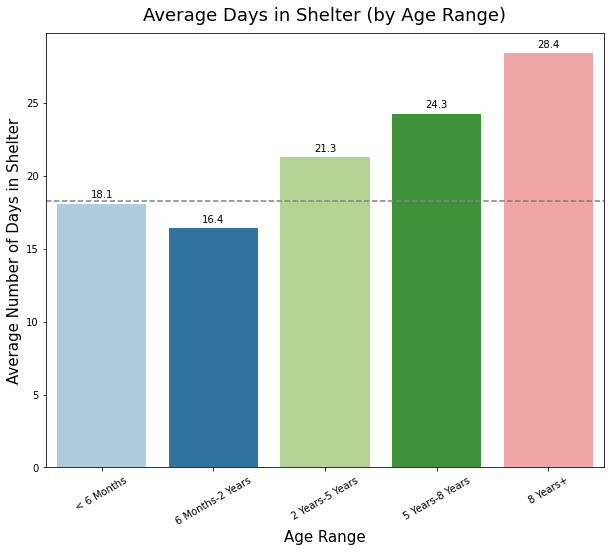

In [25]:
col_series = df['days_in_shelter'].groupby(df['age_type']).mean()

plt.figure(figsize=(10,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            palette="Paired",
            order = ['< 6 Months', '6 Months-2 Years', '2 Years-5 Years', '5 Years-8 Years','8 Years+'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  )
plt.title('Average Days in Shelter (by Age Range)', fontsize = 18, pad = 12)
plt.xlabel("Age Range", fontsize = 15)
plt.xticks(rotation=30)
plt.axhline(y=df['days_in_shelter'].mean(), color='gray', linestyle='dashed', label="Shelter Average")
plt.ylabel("Average Number of Days in Shelter",fontsize = 15);

Typically once an animal is 6 months or older, the average days in the shelter increases with age.

## II. EDA - Adoption Rate

In addition to duration, some visuals follow representing the rate of adoption for animals in the system based on a variety of variables.

### Adoption Rate by `intake_type`:

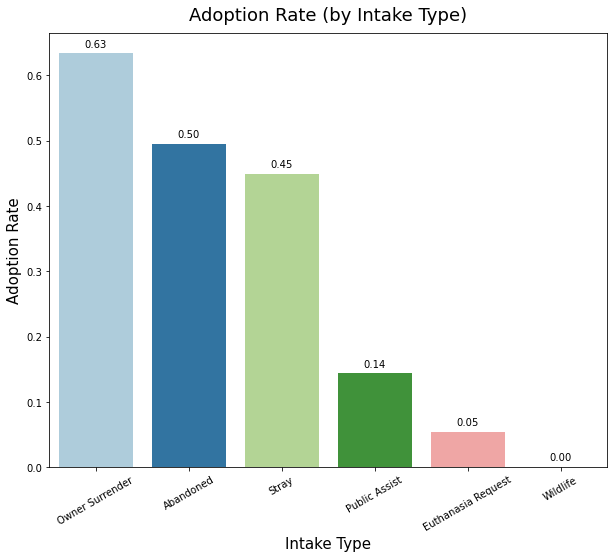

In [17]:
col_series = df['adopted'].groupby(df['intake_type']).mean()

plt.figure(figsize=(10,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            palette="Paired",
           order = ['Owner Surrender', 'Abandoned', 'Stray', 'Public Assist', 'Euthanasia Request', 'Wildlife'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Adoption Rate (by Intake Type)', fontsize = 18, pad = 12)
plt.xlabel("Intake Type", fontsize = 15)
plt.xticks(rotation=30)
plt.ylabel("Adoption Rate",fontsize = 15);

### Adoption Rate by `animal_type`:

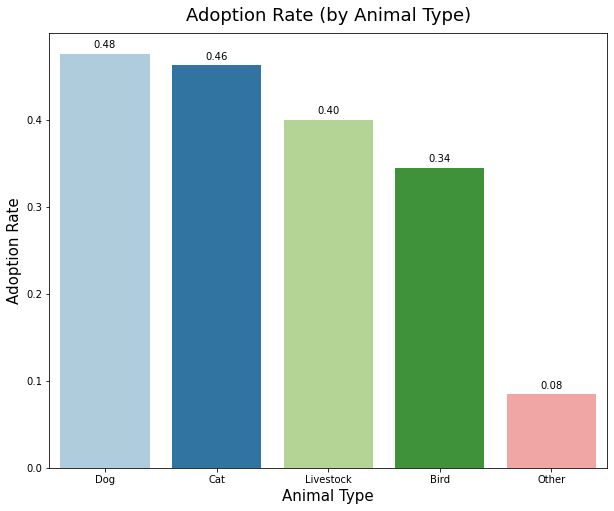

In [18]:
col_series = df['adopted'].groupby(df['animal_type']).mean()

plt.figure(figsize=(10,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            palette="Paired",
            order = ['Dog', 'Cat', 'Livestock', 'Bird', 'Other'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Adoption Rate (by Animal Type)', fontsize = 18, pad = 12)
plt.xlabel('Animal Type', fontsize = 15)
plt.ylabel('Adoption Rate', fontsize = 15);

Of all animal types in the shelter, dogs had the highest adoption rate.

### Adoption Rate by `intake_condition`:

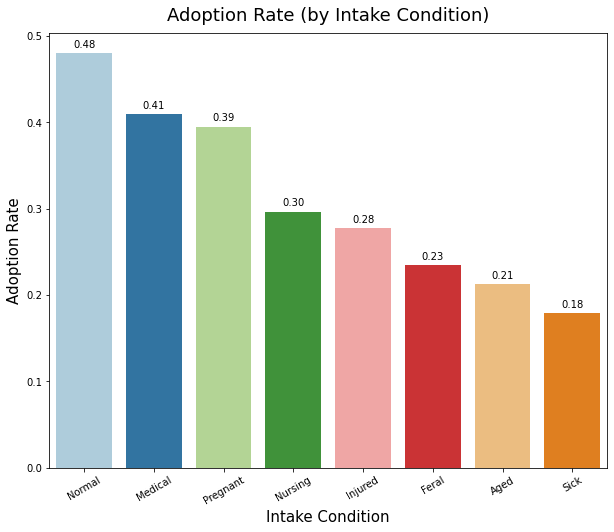

In [19]:
col_series = df['adopted'].groupby(df['intake_condition']).mean()

plt.figure(figsize=(10,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            palette="Paired",
            order = ['Normal', 'Medical', 'Pregnant','Nursing', 'Injured',
                    'Feral', 'Aged', 'Sick'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Adoption Rate (by Intake Condition)', fontsize = 18, pad = 12)
plt.xlabel("Intake Condition", fontsize = 15)
plt.xticks(rotation=30)
plt.ylabel("Adoption Rate",fontsize = 15);

Not surprisingly, animals that were considered a 'normal' intake condition had this highest adoption rate, while animals considered 'sick' has the lowest adoption rate.

### Adoption Rate by `day_in`:

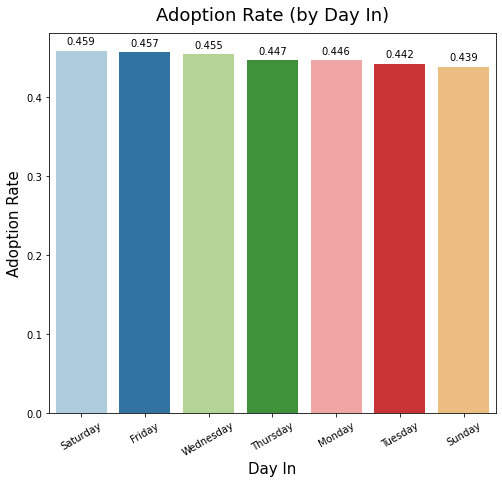

In [20]:
col_series = df['adopted'].groupby(df['day_in']).mean()

plt.figure(figsize=(8,7))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            palette="Paired",
            order = ['Saturday', 'Friday', 'Wednesday','Thursday','Monday',
                     'Tuesday', 'Sunday'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Adoption Rate (by Day In)', fontsize = 18, pad = 12)
plt.xlabel("Day In", fontsize = 15)
plt.xticks(rotation=30)
plt.ylabel("Adoption Rate",fontsize = 15);

Animals arriving to the shelter at the beinning of the weekend have a slightly higher chance of being adopted than others.

### Adoption Rate by `month_in`:

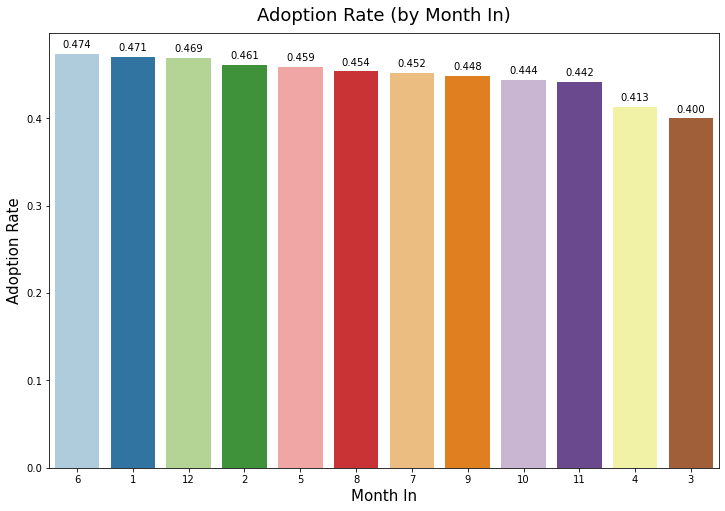

In [21]:
col_series = df['adopted'].groupby(df['month_in']).mean()

plt.figure(figsize=(12,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            palette="Paired",
            order = ['6', '1', '12', '2', '5', '8', '7', '9', '10', '11', '4', '3'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Adoption Rate (by Month In)', fontsize = 18, pad = 12)
plt.xlabel("Month In", fontsize = 15)
plt.ylabel("Adoption Rate",fontsize = 15);

Animals arriving into the shelter in the beginning of summer and winter months have a higher adoption rate than those that arrive to the shelter in the end of fall and early spring months.

### Adoption Rate by `sex`:

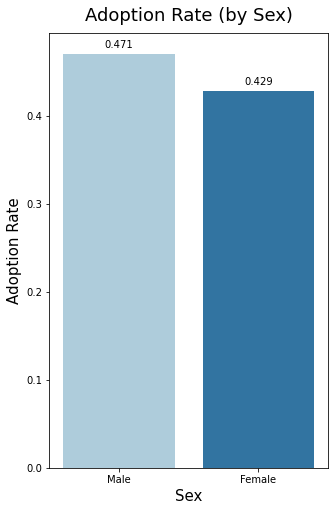

In [22]:
col_series = df['adopted'].groupby(df['sex']).mean()

plt.figure(figsize=(5,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df,
            palette="Paired",
            order = ['Male', 'Female'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Adoption Rate (by Sex)', fontsize = 18, pad = 12)
plt.xlabel("Sex", fontsize = 15)
plt.ylabel("Adoption Rate",fontsize = 15);

### Adoption Rate by `age_type`:

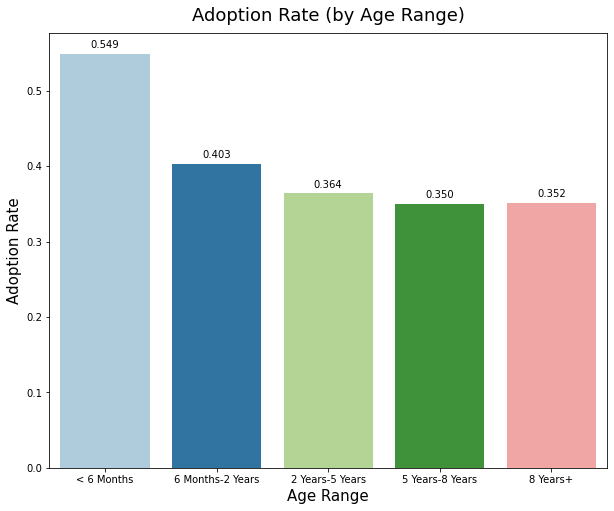

In [26]:
col_series = df['adopted'].groupby(df['age_type']).mean()

plt.figure(figsize=(10,8))
splot = sns.barplot(x=[index for index,value in col_series.items()],
                    y=[value for index,value in col_series.items()],
                    data=df, 
                    palette="Paired",
                    order = ['< 6 Months', '6 Months-2 Years', '2 Years-5 Years', '5 Years-8 Years','8 Years+'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Adoption Rate (by Age Range)', fontsize = 18, pad = 12)
plt.xlabel("Age Range", fontsize = 15)
plt.ylabel("Adoption Rate",fontsize = 15);

Not surprisingly, the younger animals in the shelter have a higher adoption rate than older animals.

# ***Next Notebook*** - [05: Models](https://github.com/ksylvia16/Animal-Outcomes-Austin-TX/blob/f7101b0ab115bdc730fb2574c0439b9e734f7b0a/code/05_Models.ipynb)